### LEVEL 1: Burst Detection and Population Metrics
    Goals:
        (1) Detect population bursts with RMS-based methods in this sequence:
                - Bin all spikes into a population firing rate
                - Smooth to reveal coherent activity
                - Apply RMS threshold to detect peaks (bursts)
                - Mark burst windows from rise to fall
                - Return the smoothed trace, burst peaks, and burst windows
                - Store time points of start and end indices and peaks of avg (container)
                - Compute and push burst metrics to DataFrame and CSV/Pickle
        (2) Detect sub-population bursting with unit-wise thresholding (dim and isi methods) 
                - Map burst classes to 'Sample' column in DataFrame as groups
                - Compute and store appropriate metrics under each class
        (3) Organize and store the above data for easy import into LEVEL 2 notebook

In [159]:
# List all _acqm.zip files that have not been downloaded to ~bioinformatics/data

from burst_analysis.loading import SpikeDataLoader

uuids = [
    "2025-07-22-e-MaxTwo_H9SynGFP_SmitsMidbrain/derived/kilosort2"
    "2025-06-17-e-KOLF2.2J_SmitsMidbrain/derived/kilosort2",
    "2025-06-24-e-KOLF2.2J_SmitsMidbrain/derived/kilosort2",
    "2025-06-26-e-KOLF2.2J_SmitsMidbrain/derived/kilosort2"
    "2025-07-01-e-KOLF2.2J_SmitsMidbrain_Baseline_6OHDA_T1/derived/kilosort2",
    "2025-07-02-e-KOLF2.2J_SmitsMidbrain_6OHDA_T1_24hr/derived/kilosort2",
    "2025-07-02-e-KOLF2.2J_SmitsMidbrain_6OHDA_T2/derived/kilosort2",
    "2025-07-03-e-KOLF2.2J_SmitsMidbrain_6OHDA_T2_24hrs/derived/kilosort2",
    "2025-07-05-e-KOLF2.2J_D95_SmitsMidbrain_6OHDA_T2_72hrs/derived/kilosort2",
    "2025-07-08-e-KOLF2.2J_D98_SmitsMidbrain_6OHDA_T2_D6/derived/kilosort2"
    "2025-07-01-e-KOLF2.2J_SmitsMidbrain_Baseline_6OHDA_T1/derived/kilosort2",
    "2025-07-02-e-KOLF2.2J_SmitsMidbrain_6OHDA_T1_24hr/derived/kilosort2",
    "2025-07-02-e-KOLF2.2J_SmitsMidbrain_6OHDA_T2/derived/kilosort2",
    "2025-07-03-e-KOLF2.2J_SmitsMidbrain_6OHDA_T2_24hrs/derived/kilosort2",
    "2025-07-05-e-KOLF2.2J_D95_SmitsMidbrain_6OHDA_T2_72hrs/derived/kilosort2",
    "2025-07-08-e-KOLF2.2J_D98_SmitsMidbrain_6OHDA_T2_D6/derived/kilosort2",
    "2025-07-12-e-KOLF2.2J_D101_SmitsMidbrain_6OHDA_T2_D10/derived/kilosort2",
    "2025-05-23-e-MaxTwo_KOLF2.2J_SmitsMidbrain/derived/kilosort2",
    "2025-05-27-e-MaxTwo_D44_KOLF2.2J_SmitsMidbrain/derived/kilosort2",
    "2025-05-29-e-MaxTwo_D46_KOLF2.2J_SmitsMidbrain/derived/kilosort2",
    "2025-06-03-e-MaxTwo_D51_KOLF2.2J_SmitsMidbrain/derived/kilosort2",
    "2025-06-05-e-MaxTwo_D53_KOLF2.2J_SmitsMidbrain_Baseline_6OHDA_T1/derived/kilosort2",
    "2025-06-05-e-MaxTwo_D53_KOLF2.2J_SmitsMidbrain_Baseline_6OHDA_T2/derived/kilosort2",
    "2025-06-05-e-MaxTwo_D53_KOLF2.2J_SmitsMidbrain_Baseline_6OHDA_T3/derived/kilosort2",
    "2025-06-05-e-MaxTwo_D53_KOLF2.2J_SmitsMidbrain_Baseline_6OHDA_T4/derived/kilosort2",
    "2025-06-05-e-MaxTwo_D53_KOLF2.2J_SmitsMidbrain_Baseline_6OHDA_T5/derived/kilosort2",
    "2025-06-05-e-MaxTwo_D53_KOLF2.2J_SmitsMidbrain_Baseline_6OHDA_T6/derived/kilosort2",
    "2025-06-05-e-MaxTwo_D53_KOLF2.2J_SmitsMidbrain_Baseline_6OHDA_T7/derived/kilosort2",
    "2025-06-05-e-MaxTwo_D53_KOLF2.2J_SmitsMidbrain_Baseline_6OHDA_T8/derived/kilosort2",
    "2025-07-22-e-MaxTwo_H9SynGFP_SmitsMidbrain/derived/kilosort2",
    "2025-07-22-e-MaxTwo_H9SynGFP_SmitsMidbrain/derived/kilosort2",
    "2025-07-22-e-MaxTwo_H9SynGFP_SmitsMidbrain/derived/kilosort2",
    "2025-07-22-e-MaxTwo_H9SynGFP_SmitsMidbrain/derived/kilosort2",
    "2025-07-26-e-MaxTwo_H9SynGFP_SmitsMidbrain_7262025_BASELINE_T1_T2_3hr_24hr/derived/kilosort2",
    "2025-07-26-e-MaxTwo_H9SynGFP_SmitsMidbrain_7262025_BASELINE_T1_T2_3hr_24hr/derived/kilosort2",
    "2025-07-26-e-MaxTwo_H9SynGFP_SmitsMidbrain_7262025_BASELINE_T1_T2_3hr_24hr/derived/kilosort2",
    "2025-07-26-e-MaxTwo_H9SynGFP_SmitsMidbrain_7262025_BASELINE_T1_T2_3hr_24hr/derived/kilosort2",
    "2025-07-26-e-MaxTwo_H9SynGFP_SmitsMidbrain_7262025_BASELINE_T1_T2_3hr_24hr/derived/kilosort2",
    "2025-07-26-e-MaxTwo_H9SynGFP_SmitsMidbrain_7262025_BASELINE_T1_T2_3hr_24hr/derived/kilosort2",
    "2025-07-26-e-MaxTwo_H9SynGFP_SmitsMidbrain_7262025_BASELINE_T1_T2_3hr_24hr/derived/kilosort2",
    "2025-07-26-e-MaxTwo_H9SynGFP_SmitsMidbrain_7262025_BASELINE_T1_T2_3hr_24hr/derived/kilosort2",
    "2025-07-26-e-MaxTwo_H9SynGFP_SmitsMidbrain_7262025_BASELINE_T1_T2_3hr_24hr/derived/kilosort2",
    "2025-07-26-e-MaxTwo_H9SynGFP_SmitsMidbrain_7262025_BASELINE_T1_T2_3hr_24hr/derived/kilosort2",
    "2025-07-26-e-MaxTwo_H9SynGFP_SmitsMidbrain_7262025_BASELINE_T1_T2_3hr_24hr/derived/kilosort2",
    "2025-07-26-e-MaxTwo_H9SynGFP_SmitsMidbrain_7262025_BASELINE_T1_T2_3hr_24hr/derived/kilosort2",
    "2025-07-26-e-MaxTwo_H9SynGFP_SmitsMidbrain_7262025_BASELINE_T1_T2_3hr_24hr/derived/kilosort2",
    "2025-07-26-e-MaxTwo_H9SynGFP_SmitsMidbrain_7262025_BASELINE_T1_T2_3hr_24hr/derived/kilosort2",
]

zip_keys = SpikeDataLoader.list_zips_on_s3(uuids)
for key in zip_keys:
    print(key)

ephys/2025-06-24-e-KOLF2.2J_SmitsMidbrain/derived/kilosort2/23128c_D84_KOLFMO_6242025_acqm.zip
ephys/2025-06-24-e-KOLF2.2J_SmitsMidbrain/derived/kilosort2/23192c_D84_KOLFMO_6242025_acqm.zip
ephys/2025-06-24-e-KOLF2.2J_SmitsMidbrain/derived/kilosort2/24430c_D84_KOLFMO_6242025_acqm.zip
ephys/2025-06-24-e-KOLF2.2J_SmitsMidbrain/derived/kilosort2/24500c_D84_KOLFMO_6242025_acqm.zip
ephys/2025-06-24-e-KOLF2.2J_SmitsMidbrain/derived/kilosort2/24535c_D84_KOLFMO_6242025_acqm.zip
ephys/2025-06-24-e-KOLF2.2J_SmitsMidbrain/derived/kilosort2/24648c_D84_KOLFMO_6242025_acqm.zip
ephys/2025-06-24-e-KOLF2.2J_SmitsMidbrain/derived/kilosort2/25159c_D84_KOLFMO_6242025_acqm.zip
ephys/2025-06-24-e-KOLF2.2J_SmitsMidbrain/derived/kilosort2/25168c_D84_KOLFMO_6242025_acqm.zip
ephys/2025-06-24-e-KOLF2.2J_SmitsMidbrain/derived/kilosort2/25178c_D84_KOLFMO_6242025_acqm.zip
ephys/2025-07-02-e-KOLF2.2J_SmitsMidbrain_6OHDA_T2/derived/kilosort2/23128c_D92_KOLFMO_722025_6OHDA_T2_acqm.zip
ephys/2025-07-02-e-KOLF2.2J_Smits

In [ ]:
# Download new _acqm.zip files into ~bioinformatics/data

from burst_analysis.loading import SpikeDataLoader
uuids = [
    #"2025-06-17-e-KOLF2.2J_SmitsMidbrain/derived/kilosort2",
    #"2025-06-24-e-KOLF2.2J_SmitsMidbrain/derived/kilosort2",
    #"2025-06-26-e-KOLF2.2J_SmitsMidbrain/derived/kilosort2"
    #"2025-07-01-e-KOLF2.2J_SmitsMidbrain_Baseline_6OHDA_T1/derived/kilosort2",
    #"2025-07-02-e-KOLF2.2J_SmitsMidbrain_6OHDA_T1_24hr/derived/kilosort2",
    #"2025-07-02-e-KOLF2.2J_SmitsMidbrain_6OHDA_T2/derived/kilosort2",
    #"2025-07-03-e-KOLF2.2J_SmitsMidbrain_6OHDA_T2_24hrs/derived/kilosort2",
    #"2025-07-05-e-KOLF2.2J_D95_SmitsMidbrain_6OHDA_T2_72hrs/derived/kilosort2",
    #"2025-07-08-e-KOLF2.2J_D98_SmitsMidbrain_6OHDA_T2_D6/derived/kilosort2",
    "2025-07-22-e-MaxTwo_H9SynGFP_SmitsMidbrain/derived/kilosort2"
]

SpikeDataLoader.fetch_zips_from_s3(
    uuid_list=uuids,
    local_dir="/Users/main_mac/bioinformatics/data"
)

[DL] ephys/2025-07-22-e-MaxTwo_H9SynGFP_SmitsMidbrain/derived/kilosort2/M06943b_D40_H9SYNGFP_7222025_well002_acqm.zip → /Users/main_mac/bioinformatics/data/M06943b_D40_H9SYNGFP_7222025_well002_acqm.zip
[DL] ephys/2025-07-22-e-MaxTwo_H9SynGFP_SmitsMidbrain/derived/kilosort2/M06943b_D40_H9SYNGFP_7222025_well003_acqm.zip → /Users/main_mac/bioinformatics/data/M06943b_D40_H9SYNGFP_7222025_well003_acqm.zip
[DL] ephys/2025-07-22-e-MaxTwo_H9SynGFP_SmitsMidbrain/derived/kilosort2/M06943b_D40_H9SYNGFP_7222025_well004_acqm.zip → /Users/main_mac/bioinformatics/data/M06943b_D40_H9SYNGFP_7222025_well004_acqm.zip
[DL] ephys/2025-07-22-e-MaxTwo_H9SynGFP_SmitsMidbrain/derived/kilosort2/M06943b_D40_H9SYNGFP_7222025_well005_acqm.zip → /Users/main_mac/bioinformatics/data/M06943b_D40_H9SYNGFP_7222025_well005_acqm.zip
[DL] ephys/2025-07-22-e-MaxTwo_H9SynGFP_SmitsMidbrain/derived/kilosort2/M08754b_D40_H9SYNGFP_7222025_well000_acqm.zip → /Users/main_mac/bioinformatics/data/M08754b_D40_H9SYNGFP_7222025_well000

In [ ]:
# Extract _acqm.zip files from ~bioinformatics/data into ~bioinformatics/data/extracted/maxone_run1 (run = a collection of samples in round of PD induction)

In [161]:
# --- Set up imports and paths ---
import sys
from pathlib import Path

# Set the project root so Python can find analysis_libs and others
project_root = Path("~/bioinformatics").expanduser().resolve()
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

# Define the data directory
data_path = project_root / "data/extracted/maxtwo_run2"

# Import burst analysis tools
from burst_analysis.loading import SpikeDataLoader
from burst_analysis.detection import BurstDetection
from burst_analysis.plotting import BurstDetectionPlots


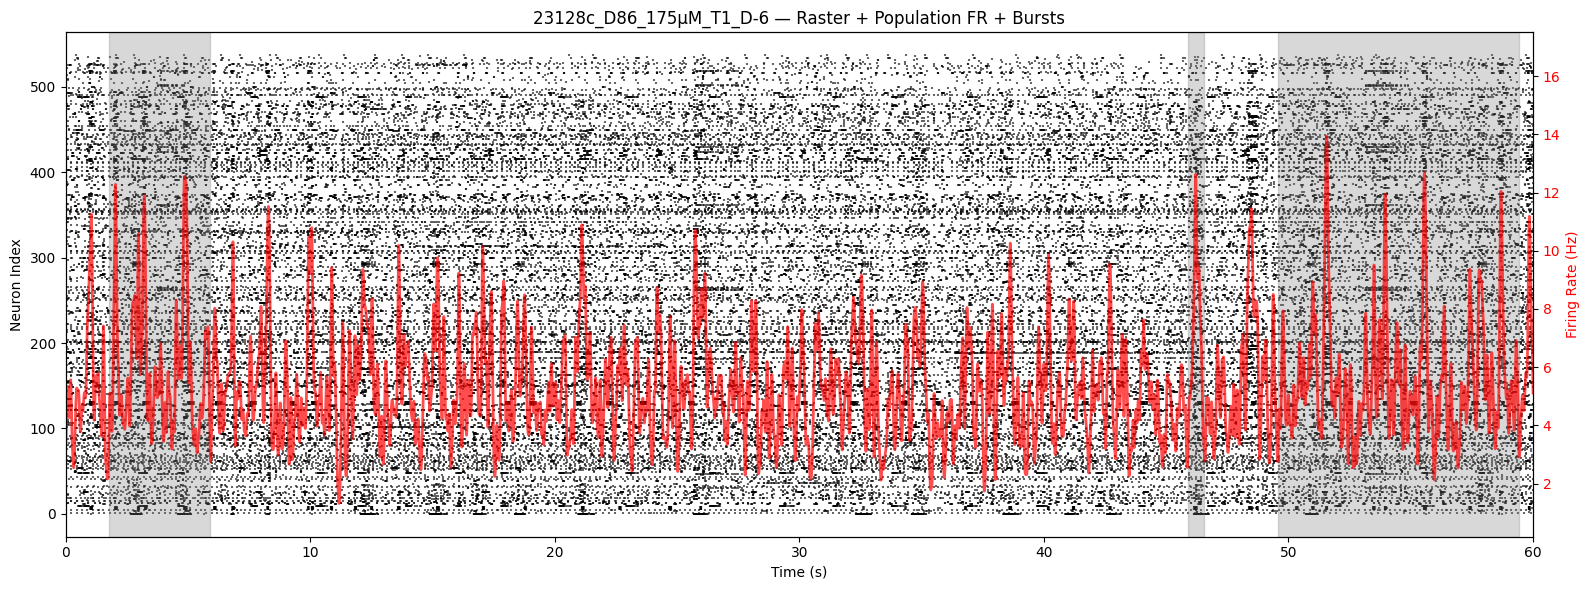

In [ ]:
# -----------------------------
# 1. Load one dataset
# -----------------------------
data_path = Path("~/bioinformatics/data/extracted/maxone_run1").expanduser()
loader = SpikeDataLoader(data_path)
datasets = loader.load()

# Pick one dataset
key = list(datasets.keys())[0]
spike_data = datasets[key]

# -----------------------------
# 2. Configure and run detector
# -----------------------------
config = {
    "bin_size_ms": 4,
    "square_win_ms": 5,
    "gauss_win_ms": 30,
    "threshold_rms": 2.0,
    "min_dist_ms": 200,
    "min_merge_separation_ms": 2000,
    "burst_edge_fraction": 0.25
}

bd = BurstDetection(spike_data.train, fs=spike_data.metadata.get("fs", 10000), config=config)

result = bd.compute_population_rate_and_bursts()
times, smoothed, peaks, peak_times, bursts, burst_windows = result

# -----------------------------
# 3. Plot raster + population
# -----------------------------
BurstDetectionPlots.plot_overlay_raster_population(
    trains=spike_data.train,
    times=times,
    smoothed=smoothed,
    bursts=bursts,
    dataset_label=key,
    time_range=(0, 60)
)


In [ ]:
# UI with sliders for detection params, graphs, and top-level metrics

from projects.parkinsons.coordinator import OrchestratorPDx2
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import VBox, HBox, FloatSlider, IntSlider, Dropdown, Button, Output

# Instantiate orchestrator
data_path = Path("~/bioinformatics/data/extracted/maxone_run1").expanduser()
orch = OrchestratorPDx2(data_path)

# Widget controls
bin_size_ms_slider = FloatSlider(value=10, min=1, max=20, step=1, description="BinSize (ms)")
threshold_slider = FloatSlider(min=1, max=5, step=0.1, value=3.0, description="RMSThresh")
edge_slider = FloatSlider(min=0.05, max=0.5, step=0.01, value=0.1, description="EdgeThresh")
gauss_slider = IntSlider(min=1, max=200, step=2, value=100, description="Gaussian")
square_slider = IntSlider(min=1, max=100, step=2, value=20, description="Square")
min_dist_slider = IntSlider(min=100, max=5000, step=50, value=300, description="MinDist")
time_start_slider = IntSlider(min=0, max=1800, step=10, value=0, description="Start(s)")
window_slider = IntSlider(min=10, max=510, step=5, value=120, description="Duration(s)")
#min_merge_separation_slider = IntSlider(min=1000, max=3000, step=100, value=2000, description="MinMergeSep")
dataset_dropdown = Dropdown(options=bd.list_datasets(), value=bd.list_datasets()[2], description='Dataset:')
run_button = Button(description="Update Plot", button_style="success")

# Output area
out = Output()
burst_extraction_records = []


In [ ]:
def update_plot(change=None):
    with out:
        out.clear_output()
        try:
            plt.close('all')

            # === Extract UI values ===
            dataset = dataset_dropdown.value
            time_start = time_start_slider.value
            time_window = window_slider.value

            config = {
                "bin_size_ms": bin_size_ms_slider.value,
                "threshold_rms": threshold_slider.value,
                "burst_edge_fraction": edge_slider.value,
                "gauss_win_ms": gauss_slider.value,
                "square_win_ms": square_slider.value,
                "min_dist_ms": min_dist_slider.value,
                "time_start": time_start,
                "time_window": time_window
            }

            time_range = (time_start, time_start + time_window)

            print(f"Selected dataset: {dataset}")
            print(f"Time range: {time_range}")
            print(f"Config: {config}")

            # === Run detection + plotting via orchestrator ===
            orch.compute_and_plot_population_bursts(
                dataset_keys=[dataset],
                config=config,
                time_range=time_range,
                save=False,
                store_results=True
            )

            # === Get latest metrics for the dataset ===
            latest_df = bd.burst_detection_metrics_df
            latest = latest_df[latest_df["dataset_key"] == dataset].iloc[-1].to_dict()

            if latest.get("duration_s", 0) == 0:
                print("No spikes in selected time window. Try a different time or dataset.")
                return

            # === Print burst summary ===
            print(f"\nBurst Extraction Summary — {dataset}")
            print(f"Recording duration: {latest['duration_s']:.2f} s")
            print(f"Total spikes: {latest['n_total_spikes']}")
            print(f"Number of neurons: {latest['n_neurons']}")
            print(f"Mean firing rate per neuron: {latest['mean_rate_per_neuron']:.2f} Hz")

            if latest["n_total_bursts"] > 0:
                print(f"\nBursts detected: {latest['n_total_bursts']}")
                print(f"Mean burst duration: {latest['mean_burst_dur']:.3f} s")
                print(f"Std of burst durations: {latest['std_burst_dur']:.3f} s")
                print(f"Burst rate: {latest['burst_rate_per_min']:.2f} bursts/min")
                if latest["mean_IBI"]:
                    print(f"Mean inter-burst interval (IBI): {latest['mean_IBI']:.2f} s")
            else:
                print("\nNo bursts detected.")

            # === Build record (all key metrics included) ===
            record = {
                "Sample": dataset,
                "bin_size_ms": config["bin_size_ms"],
                "threshold_rms": config["threshold_rms"],
                "burst_edge_fraction": config["burst_edge_fraction"],
                "gauss_win_ms": config["gauss_win_ms"],
                "square_win_ms": config["square_win_ms"],
                "min_dist_ms": config["min_dist_ms"],
                "time_start": config["time_start"],
                "time_window": config["time_window"],
                "total_spikes": latest.get("n_total_spikes"),
                "duration_s": latest.get("duration_s"),
                "n_neurons": latest.get("n_neurons"),
                "mean_rate_per_neuron": latest.get("mean_rate_per_neuron"),
                "n_bursts": latest.get("n_total_bursts"),
                "mean_burst_duration": latest.get("mean_burst_dur"),
                "std_burst_duration": latest.get("std_burst_dur"),
                "burst_rate_per_min": latest.get("burst_rate_per_min"),
                "mean_ibi": latest.get("mean_IBI"),
                # optional additional fields if available in your df:
                "peak_times": latest.get("peak_times", []),
                "burst_windows": latest.get("burst_windows", []),
                "dataset_key": dataset
            }

            # === Identify uniqueness based on config ===
            identity_keys = [
                "Sample", "bin_size_ms", "threshold_rms", "burst_edge_fraction",
                "gauss_win_ms", "square_win_ms", "min_dist_ms", "time_start", "time_window"
            ]

            # === Search for existing record ===
            match_idx = None
            for idx, existing in enumerate(burst_extraction_records):
                if all(existing.get(k) == record[k] for k in identity_keys):
                    match_idx = idx
                    break

            # === Update or append ===
            if match_idx is not None:
                burst_extraction_records[match_idx] = record
                print("Updated existing record.")
            else:
                burst_extraction_records.append(record)
                print("Added new record.")

        except Exception as e:
            import traceback
            traceback.print_exc()
            print(f"\nError during update_plot: {e}")

# Hook up the run button
run_button.on_click(update_plot)

# Display the full UI
ui = VBox([
    HBox([dataset_dropdown, run_button]),
    HBox([bin_size_ms_slider, threshold_slider, edge_slider]),
    HBox([gauss_slider, square_slider, min_dist_slider]),
    HBox([time_start_slider, window_slider]),
    out
])
display(ui)

In [155]:
import pandas as pd
import json
from pathlib import Path

csv_path = Path("~/bioinformatics/projects/parkinsons/metrics.csv").expanduser()

new_df = pd.DataFrame(burst_extraction_records)

if not new_df.empty:
    # Load old data if exists
    if csv_path.exists():
        df_existing = pd.read_csv(csv_path)
    else:
        df_existing = pd.DataFrame()

    # Combine and deduplicate
    identity_keys = [
        "Sample", "bin_size_ms", "threshold_rms", "burst_edge_fraction",
        "gauss_win_ms", "square_win_ms", "min_dist_ms", "time_start", "time_window"
    ]
    combined = pd.concat([df_existing, new_df], ignore_index=True)
    combined = combined.drop_duplicates(subset=identity_keys, keep="last")

    # Convert list-like columns for Parquet compatibility
    list_columns = [col for col in combined.columns if combined[col].apply(lambda x: isinstance(x, (list, tuple))).any()]
    for col in list_columns:
        combined[col] = combined[col].apply(lambda x: json.dumps(x) if isinstance(x, (list, tuple)) else x)

    # Save files
    combined.to_csv(csv_path, index=False)
    combined.to_parquet("burst_extraction_records.parquet", index=False)

    print(f"Saved {len(combined)} unique records to {csv_path}")
    display(combined.tail(10))
else:
    print("No burst extraction records available.")



No burst extraction records available.


In [156]:
import pandas as pd
import json
from pathlib import Path

csv_path = Path("~/bioinformatics/projects/parkinsons/metrics.csv").expanduser()

def safe_json_load(x):
    """
    Safely loads JSON strings. Returns the original value if:
    - it's not a string
    - it's empty
    - it's invalid JSON
    """
    if isinstance(x, str):
        x = x.strip()
        if x.startswith("[") and x.endswith("]"):
            try:
                return json.loads(x)
            except json.JSONDecodeError:
                return x  # return raw string if parsing fails
    return x

if csv_path.exists():
    df = pd.read_csv(csv_path)

    # Attempt to load any JSON-like column safely
    for col in df.columns:
        if df[col].dtype == "object":
            df[col] = df[col].apply(safe_json_load)

    burst_extraction_records = df.to_dict(orient="records")
    print(f"Loaded {len(burst_extraction_records)} records from {csv_path}")
else:
    burst_extraction_records = []
    print("No saved metrics.csv found — starting fresh.")


Loaded 25 records from /Users/main_mac/bioinformatics/projects/parkinsons/metrics.csv
